In [31]:
import Pkg
Pkg.activate(mktempdir())
Pkg.add([
    Pkg.PackageSpec(name="Plots"),
    Pkg.PackageSpec(name="LinearAlgebra"),
    Pkg.PackageSpec(name="StatsBase"),
    Pkg.PackageSpec(name="Images"),
    Pkg.PackageSpec(name="Clustering"),
    Pkg.PackageSpec(name="StatsPlots"),
    Pkg.PackageSpec(name="MAT"),
    Pkg.PackageSpec(name="GaussianMixtures"),
    Pkg.PackageSpec(name="Distributions"),
])
using Plots, LinearAlgebra, StatsBase, Images, Clustering, StatsPlots, MAT, GaussianMixtures, Distributions

  Activating new environment at `/tmp/jl_c53oGj/Project.toml`
   Resolving package versions...
    Updating `/tmp/jl_c53oGj/Project.toml`
  [aaaa29a8] + Clustering v0.14.2
  [31c24e10] + Distributions v0.24.18
  [cc18c42c] + GaussianMixtures v0.3.4
  [916415d5] + Images v0.24.1
  [23992714] + MAT v0.10.1
  [91a5bcdd] + Plots v1.14.0
  [2913bbd2] + StatsBase v0.33.8
  [f3b207a7] + StatsPlots v0.14.21
  [37e2e46d] + LinearAlgebra
    Updating `/tmp/jl_c53oGj/Manifest.toml`
  [621f4979] + AbstractFFTs v1.0.1
  [79e6a3ab] + Adapt v3.3.0
  [7d9fca2a] + Arpack v0.4.0
  [4fba245c] + ArrayInterface v3.1.12
  [13072b0f] + AxisAlgorithms v1.0.0
  [39de3d68] + AxisArrays v0.4.3
  [a74b3585] + Blosc v0.7.0
  [e1450e63] + BufferedStreams v1.0.0
  [fa961155] + CEnum v0.4.1
  [336ed68f] + CSV v0.8.4
  [aafaddc9] + CatIndices v0.2.2
  [324d7699] + CategoricalArrays v0.10.0
  [d360d2e6] + ChainRulesCore v0.9.43
  [aaaa29a8] + Clustering v0.14.2
  [944b1d66] + CodecZlib v0.7.0
  [35d6a980] + ColorScheme

  [91d4177d] + Opus_jll v1.3.1+3
  [2f80f16e] + PCRE_jll v8.42.0+4
  [30392449] + Pixman_jll v0.40.0+0
  [ea2cea3b] + Qt5Base_jll v5.15.2+0
  [f50d1b31] + Rmath_jll v0.3.0+0
  [a2964d1f] + Wayland_jll v1.17.0+4
  [2381bf8a] + Wayland_protocols_jll v1.18.0+4
  [02c8fc9c] + XML2_jll v2.9.11+0
  [aed1982a] + XSLT_jll v1.1.33+4
  [4f6342f7] + Xorg_libX11_jll v1.6.9+4
  [0c0b7dd1] + Xorg_libXau_jll v1.0.9+4
  [935fb764] + Xorg_libXcursor_jll v1.2.0+4
  [a3789734] + Xorg_libXdmcp_jll v1.1.3+4
  [1082639a] + Xorg_libXext_jll v1.3.4+4
  [d091e8ba] + Xorg_libXfixes_jll v5.0.3+4
  [a51aa0fd] + Xorg_libXi_jll v1.7.10+4
  [d1454406] + Xorg_libXinerama_jll v1.1.4+4
  [ec84b674] + Xorg_libXrandr_jll v1.5.2+4
  [ea2f1a96] + Xorg_libXrender_jll v0.9.10+4
  [14d82f49] + Xorg_libpthread_stubs_jll v0.1.0+3
  [c7cfdc94] + Xorg_libxcb_jll v1.13.0+3
  [cc61e674] + Xorg_libxkbfile_jll v1.1.0+4
  [12413925] + Xorg_xcb_util_image_jll v0.4.0+1
  [2def613f] + Xorg_xcb_util_jll v0.4.0+1
  [975044d2] + Xorg_xcb_ut

In [154]:
dogdata_w_mat = matread("dogData_w.mat")
catdata_w_mat = matread("catData_w.mat")

dog_wave = dogdata_w_mat["dog_wave"]
cat_wave = catdata_w_mat["cat_wave"]

CD = [dog_wave cat_wave]
u,s,v = svd(CD .- mean(CD))
vT = v'

dogcat = v[:,2:2:4]

160×2 Matrix{Float64}:
  0.0123648    -0.151665
  0.000358803  -0.0698672
  0.0477566     0.0801119
 -0.0736175    -0.072622
 -0.0347664    -0.0315937
 -0.0456147    -0.0605091
  0.00172426   -0.0989736
 -0.0154337    -0.166863
 -0.0559134    -0.0701379
  0.0473408    -0.0289306
 -0.0113499    -0.0638025
 -0.03819       0.0259204
 -0.0202803    -0.042295
  ⋮            
  0.11882       0.00542751
  0.0469285     0.0409856
 -0.0288454    -0.0245473
  0.0757934     0.067995
  0.0565514     0.0345196
  0.0499902     0.0252929
  0.0997029    -0.00794689
  0.0980205     0.0215056
  0.120019     -0.0126529
  0.0977543     0.0381716
  0.112649      0.0128881
  0.0598734     0.0606825

In [203]:
gm = GMM(2, dogcat, kind=:full)# train the GMM

K-means converged with 11 iterations (objv = 0.9756388019775751)


┌ Info: Initializing GMM, 2 Gaussians diag covariance 2 dimensions using 160 data points
└ @ GaussianMixtures /home/frank/.julia/packages/GaussianMixtures/1pQcF/src/train.jl:79
┌ Info: K-means with 160 data points using 11 iterations
│ 26.7 data points per parameter
└ @ GaussianMixtures /home/frank/.julia/packages/GaussianMixtures/1pQcF/src/train.jl:140


GMM{Float64} with 2 components in 2 dimensions and full covariance
Mix 1: weight 0.364088
 mean: [-0.02840388465551274, -0.07370495880912398]
 covariance: 2×2 Matrix{Float64}:
  0.00105349   -0.000711062
 -0.000711062   0.0043321
Mix 2: weight 0.635912
 mean: [0.0768532074327494, 0.007853991616446251]
 covariance: 2×2 Matrix{Float64}:
  0.0028569   -0.00139512
 -0.00139512   0.0041761


In [204]:
# transforming it to a Mixture Model, which we can treat like a pdf
mm = MixtureModel(gm)   

MixtureModel{FullNormal}(K = 2)
components[1] (prior = 0.3641): FullNormal(
dim: 2
μ: [-0.02840388465551274, -0.07370495880912398]
Σ: [0.0010534876263651057 -0.0007110619408084196; -0.0007110619408084196 0.004332103270096956]
)

components[2] (prior = 0.6359): FullNormal(
dim: 2
μ: [0.0768532074327494, 0.007853991616446251]
Σ: [0.0028568989645258516 -0.0013951151259768886; -0.0013951151259768886 0.004176095134933445]
)



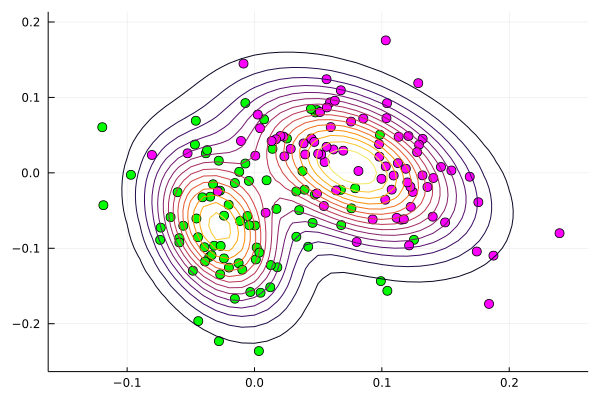

In [205]:
# Printing
gr()
scatter(v[1:80,2],v[1:80,4],ms=5, c=:lime, leg=false)
scatter!(v[81:end,2],v[81:end,4],ms=5, c=:magenta, leg=false)
X = -0.15:.01:0.25
Y = -0.25:.01:0.2
Z = [pdf(mm,[x,y]) for x in X, y in Y]
plot!(X,Y,Z',st=:contour)

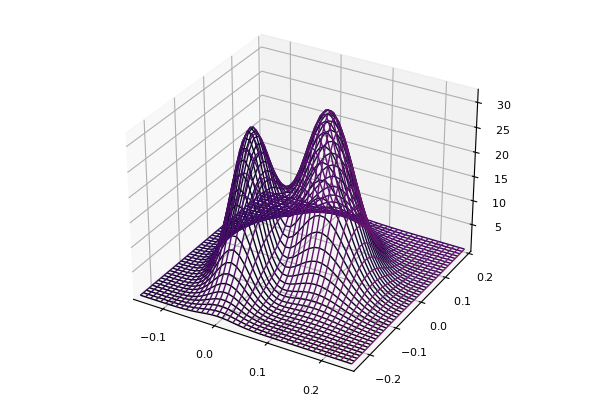

In [206]:
pyplot()
wireframe(X, Y, Z')

In [207]:
function n_parameters(gmm)
    # number of free parameters in the model
    mean_params = gmm.d * gmm.n
    if kind(gmm) == :diag
        cov_params = gmm.n * gmm.d
    else     # kind(gmm) == :full
        cov_params = gmm.n * gmm.d * (gmm.d + 1) / 2
    end
    return Int(cov_params + mean_params + gmm.n - 1)
end

n_parameters (generic function with 1 method)

In [208]:
aic(gmm, data) = 2 * n_parameters(gm) - 2 * avll(gmm, data) * size(data, 1) * gmm.d

aic (generic function with 1 method)

In [209]:
aic(gm, dogcat)

-792.7558189397175

In [210]:
# Note that the package uses avll as a score
avll(gm, dogcat)

1.2730559670933086

In [174]:
# Posteriors for data dogcat to belong to either Gaussian in the model gm
gmmposterior(gm, dogcat)[1]  

160×2 Matrix{Float64}:
 0.00882674   0.991173
 0.0871992    0.912801
 0.999546     0.000454087
 0.00210058   0.997899
 0.0418431    0.958157
 0.00877783   0.991222
 0.0325118    0.967488
 0.000682221  0.999318
 0.00403952   0.99596
 0.970596     0.0294042
 0.0502268    0.949773
 0.223038     0.776962
 0.0630863    0.936914
 ⋮            
 0.999999     6.97637e-7
 0.997875     0.00212485
 0.0725791    0.927421
 0.999975     2.52455e-5
 0.999069     0.000930614
 0.997243     0.00275749
 0.99998      2.01993e-5
 0.999992     7.7843e-6
 0.999999     1.22691e-6
 0.999996     4.16511e-6
 0.999999     1.31266e-6
 0.999765     0.000235047

In [194]:
pyplot()
plots = []
for k in 1:4 
    gm = GMM(k, dogcat, kind=:diag)
    mm = MixtureModel(gm)
    Z = [pdf(mm,[x,y]) for x in X, y in Y]
    push!(plots, wireframe(X, Y, Z', c=:black, title="$(aic(gm, dogcat))"))
end

K-means converged with 5 iterations (objv = 0.9712769961984259)
K-means converged with 5 iterations (objv = 0.6082848431284533)
K-means converged with 4 iterations (objv = 0.4762244969823086)


┌ Info: Initializing GMM, 2 Gaussians diag covariance 2 dimensions using 160 data points
└ @ GaussianMixtures /home/frank/.julia/packages/GaussianMixtures/1pQcF/src/train.jl:79
┌ Info: K-means with 160 data points using 5 iterations
│ 26.7 data points per parameter
└ @ GaussianMixtures /home/frank/.julia/packages/GaussianMixtures/1pQcF/src/train.jl:140
┌ Info: Initializing GMM, 3 Gaussians diag covariance 2 dimensions using 160 data points
└ @ GaussianMixtures /home/frank/.julia/packages/GaussianMixtures/1pQcF/src/train.jl:79
┌ Info: K-means with 160 data points using 5 iterations
│ 17.8 data points per parameter
└ @ GaussianMixtures /home/frank/.julia/packages/GaussianMixtures/1pQcF/src/train.jl:140
┌ Warning: Variances had to be floored 
│   ind = [2]
└ @ GaussianMixtures /home/frank/.julia/packages/GaussianMixtures/1pQcF/src/train.jl:259
┌ Warning: Variances had to be floored 
│   ind = [2]
└ @ GaussianMixtures /home/frank/.julia/packages/GaussianMixtures/1pQcF/src/train.jl:259
┌ Wa

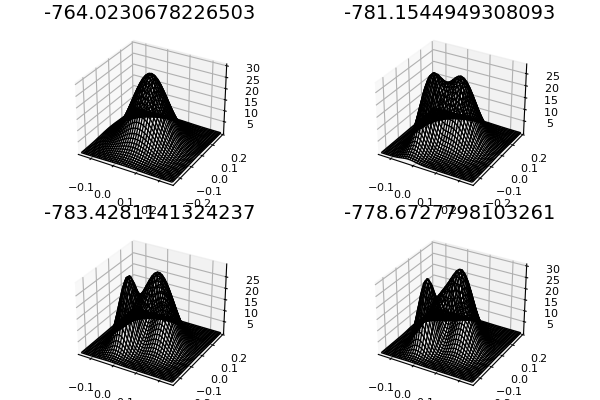

In [195]:
plot(plots...)

In [5]:
# Loading the disclaimer
using Markdown
url = "https://github.com/frankhuettner/Data_Driven_Science_Julia_Demos/raw/main/disclaimer.md"
datafile = url |> download 
datafile = open(datafile,"r")
lines = readlines(datafile)
close(datafile)
lines[1]
Markdown.parse(lines[1]) 

[Frank Huettner](https://frankhuettner.de) has created this Pluto notebook with Julia code and all errors are on him. It mimics the [Matlab code here](https://github.com/dynamicslab/databook_matlab), and it is intended as a companion to book:  [Data Driven Science & Engineering: Machine Learning, Dynamical Systems, and Control by S. L. Brunton and J. N. Kutz, Cambridge Textbook, 2019, Copyright 2019, All Rights Reserved](http://databookuw.com/databook.pdf).  Please cite this book when using this data/code and like this repo if you found the code useful. No guarantee can be given for the functionality of this code.
